In [64]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from comut import comut

def load_json(file):
    with open(file) as fp:
        data = json.load(fp)
    return data

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams["font.family"] = "arial"

data = load_json(file="summary.collapsed.json")

In [65]:
def normalize_rgb(dictionary):
    for color in dictionary.keys():
        r, g, b = dictionary[color]
        dictionary[color] = (r / 255., g / 255., b / 255.)
    return dictionary

tableau10 = {
    'blue': (78, 121, 167), 'orange': (242, 142, 43), 'red': (225, 87, 89),
    'cyan': (118, 183, 178), 'green': (89, 161, 79), 'yellow': (237, 201, 72),
    'purple': (176, 122, 161), 'pink': (225, 157, 167), 'brown': (156, 117, 95),
    'grey': (186, 176, 172), 'white': (240, 240, 240)
}

tableau10 = normalize_rgb(tableau10)

In [66]:
# We create a comutation plot with:
# - categorical variants on rows
# - categories on columns
# - A bar chart on the right with the count of approvals

data_categories = []
data_counts = []
for record in data:
    categorical_variant = list(record.keys())[0]
    dictionary = record[categorical_variant]
    
    categories = pd.Series(dictionary['categories'])
    categories = (
        categories#.loc[categories]
        .to_frame()
        .reset_index()
        .rename(columns={'index': 'sample', 0: 'value'})
    )
    categories['category'] = categorical_variant
    categories = categories.loc[:, ['sample', 'category', 'value']]

    counts = pd.DataFrame(
        {'category': categorical_variant, 'FDA approvals': dictionary['relevant_approvals_count']},
        index=[0]
    )

    data_categories.append(categories)
    data_counts.append(counts)

data_categories = pd.concat(data_categories, ignore_index=True)
data_counts = pd.concat(data_counts, ignore_index=True)

data_categories['sample'] = data_categories['sample'].str.replace('_', ' ')

data_counts['FDA approvals'] = data_counts['FDA approvals'].astype(int)
data_counts = data_counts.reset_index(drop=True)

In [67]:
data_categories.head()

,sample,category,value
0,allele origin,(suspected) deleterious BRCA1/2 variants,False
1,amino acid,(suspected) deleterious BRCA1/2 variants,False
2,clinical annotation,(suspected) deleterious BRCA1/2 variants,False
3,exon,(suspected) deleterious BRCA1/2 variants,False
4,fusion partner,(suspected) deleterious BRCA1/2 variants,False


In [68]:
data_counts.head()

,category,FDA approvals
0,(suspected) deleterious BRCA1/2 variants,1
1,(suspected) deleterious gBRCA1/2 variants,9
2,AKT1 variants,1
3,ALK variants,1
4,BRAF V600,3


In [69]:
data_categories_counts = data_categories.loc[data_categories['value'].eq(True), 'sample'].value_counts()
data_categories_counts

sample
gene                   36
variant type           15
fusion partner          7
exon                    4
pathogenicity           3
clinical annotation     3
allele origin           1
amino acid              1
gene set                1
Name: count, dtype: int64

In [70]:
data_counts = (
    data_counts
    .sort_values(by=['FDA approvals', 'category'], ascending=[True, False])
)

categories_order = (
    data_categories_counts.index.tolist()
    #data_categories_counts.index.sort_values().tolist()
)
categorical_variant_order = (
    data_counts
    .loc[:, 'category']
    .sort_values(ascending=False)
    .tolist()
)

In [71]:
data_counts.head()

,category,FDA approvals
29,susceptible FGFR3 variants,1
28,non-resistant EGFR variants,1
25,RET variants,1
24,PTEN variants,1
22,PDGFRA/B rearrangements,1


In [72]:
data_categories

,sample,category,value
0,allele origin,(suspected) deleterious BRCA1/2 variants,False
1,amino acid,(suspected) deleterious BRCA1/2 variants,False
2,clinical annotation,(suspected) deleterious BRCA1/2 variants,False
3,exon,(suspected) deleterious BRCA1/2 variants,False
4,fusion partner,(suspected) deleterious BRCA1/2 variants,False
...,...,...,...
328,fusion partner,ROS1 fusions,True
329,gene,ROS1 fusions,True
330,gene set,ROS1 fusions,False
331,pathogenicity,ROS1 fusions,False


In [73]:
data_counts

,category,FDA approvals
29,susceptible FGFR3 variants,1
28,non-resistant EGFR variants,1
25,RET variants,1
24,PTEN variants,1
22,PDGFRA/B rearrangements,1
21,PDGFRA exon 18 variants,1
19,KRAS variants,1
18,KMT2A translocations,1
14,HER2 (ERBB2) variants,1
10,FGFR1 rearrangements,1


In [74]:
data_counts['category'].isin(data_categories['category']).value_counts()

category
True    37
Name: count, dtype: int64

In [100]:
horizontal_data_categories = data_categories.copy(deep=True)
horizontal_data_categories['sample'] = data_categories['category']
horizontal_data_categories['category'] = data_categories['sample']
horizontal_data_categories.head()

,sample,category,value
0,(suspected) deleterious BRCA1/2 variants,allele origin,False
1,(suspected) deleterious BRCA1/2 variants,amino acid,False
2,(suspected) deleterious BRCA1/2 variants,clinical annotation,False
3,(suspected) deleterious BRCA1/2 variants,exon,False
4,(suspected) deleterious BRCA1/2 variants,fusion partner,False


In [108]:
data_counts_horizontal = data_counts.copy(deep=True)
data_counts_horizontal.rename(columns={'category': 'sample'}, inplace=True)
data_counts_horizontal

,sample,FDA approvals
29,susceptible FGFR3 variants,1
28,non-resistant EGFR variants,1
25,RET variants,1
24,PTEN variants,1
22,PDGFRA/B rearrangements,1
21,PDGFRA exon 18 variants,1
19,KRAS variants,1
18,KMT2A translocations,1
14,HER2 (ERBB2) variants,1
10,FGFR1 rearrangements,1


In [ ]:
def plot_comutation_plot(categories_data, counts_data, categories_order, categorical_variant_order, show_categories=True, show_legend=False):
    custom_rcParams = {
        'font.family': 'Arial',
        'font.size': 12,
        'axes.labelsize': 13,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    }
    
    plt.rcParams.update(custom_rcParams)
    
    comut_object = comut.CoMut()
    comut_object.samples = categories_order
    comut_object.add_categorical_data(
        categories_data, 
        name = 'Categories',
        category_order = categorical_variant_order,
        mapping = {
            True: tableau10['blue'],
            False: '#F2F2F2'
        }
    )
    comut_object.add_side_bar_data(
        counts_data,
        name = 'Counts',
        paired_name = 'Categories',
        mapping = {
            'FDA approvals': tableau10['orange']
        },
        xlabel = 'FDA approvals',
        position = 'right',
        bar_kwargs = {
            'height': 0.8,
        }
    )
    
    comut_object.plot_comut(
        figsize = (5, 10),
        x_padding = 0.04,
        y_padding = 0.04
    )
    
    for p in comut_object.axes['Counts'].patches:
        value = p.get_height()
        comut_object.axes['Counts'].annotate(
            f'{value:.0f}',
            (p.get_x() + p.get_width()/2, value),
            xytext=(0, 3),
            textcoords='offset points',
            va='bottom',
            ha='center'
        )

    ax = comut_object.axes['Categories']
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_ha('right')
        label.set_rotation_mode('anchor')
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_title(
        'Categorical variants associated with oncology approvals\nfrom the US Food and Drug Administration', 
        fontsize=12
    )
    
    if not show_categories:
        comut_object.axes['Categories'].set_xticklabels([])
    
    if show_legend:
        comut_object.add_unified_legend(
            axis_name='Categories', # Rename after resolving https://github.com/ga4gh/2025-catvar-call-to-action/issues/2
            loc=2
        )

    return comut_object

In [204]:
def plot_comutation_plot_horizontal(categories_data, counts_data, categories_order, categorical_variant_order, show_categories=True, show_legend=False):
    custom_rcParams = {
        'font.family': 'Arial',
        'font.size': 12,
        'axes.labelsize': 13,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    }
    
    plt.rcParams.update(custom_rcParams)
    
    comut_object = comut.CoMut()
    comut_object.samples = categorical_variant_order
    comut_object.add_categorical_data(
        categories_data, 
        name = 'Categories',
        category_order = categories_order,
        mapping = {
            True: tableau10['blue'],
            False: '#F2F2F2'
        }
    )
    
    comut_object.add_bar_data(
        counts_data,
        name = 'Counts',
        mapping = {
            'FDA approvals': tableau10['orange']
        },
        ylabel = 'Approvals',
    )
    
    comut_object.plot_comut(
        figsize = (15, 3),
        x_padding = 0.04,
        y_padding = 0.04
    )
    
    for p in comut_object.axes['Counts'].patches:
        value = p.get_height()
        comut_object.axes['Counts'].annotate(
            f'{value:.0f}',
            (p.get_x(), p.get_height() + 1.5),
            xytext=(3, 0),
            textcoords='offset points',
            va='center',
            ha='left'
        )

    ax = comut_object.axes['Categories']
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_ha('right')
        label.set_rotation_mode('anchor')
    ax.set_xlabel('Categories', fontsize=16)
    ax.set_title(
        'Categorical variants associated with oncology approvals\nfrom the US Food and Drug Administration', 
        y=1.50,
        fontsize=16
    )

    ax_approvals = comut_object.axes['Counts']
    ax_approvals.set_ylabel("Approvals", rotation=0, labelpad=40)
    ax_approvals.set_ylim([0, 13])
    ax_approvals.set_yticklabels([])
    ax_approvals.set_yticks([])
    #comut_object.axes['Counts'].yaxis.label.set_rotation(0)
    #ax_approvals.yaxis.label.set_rotation(90)
    #label.set_rotation(90)
    
    if not show_categories:
        comut_object.axes['Categories'].set_xticklabels([])
    
    if show_legend:
        comut_object.add_unified_legend(
            axis_name='Categories',
            loc=2
        )

    return comut_object

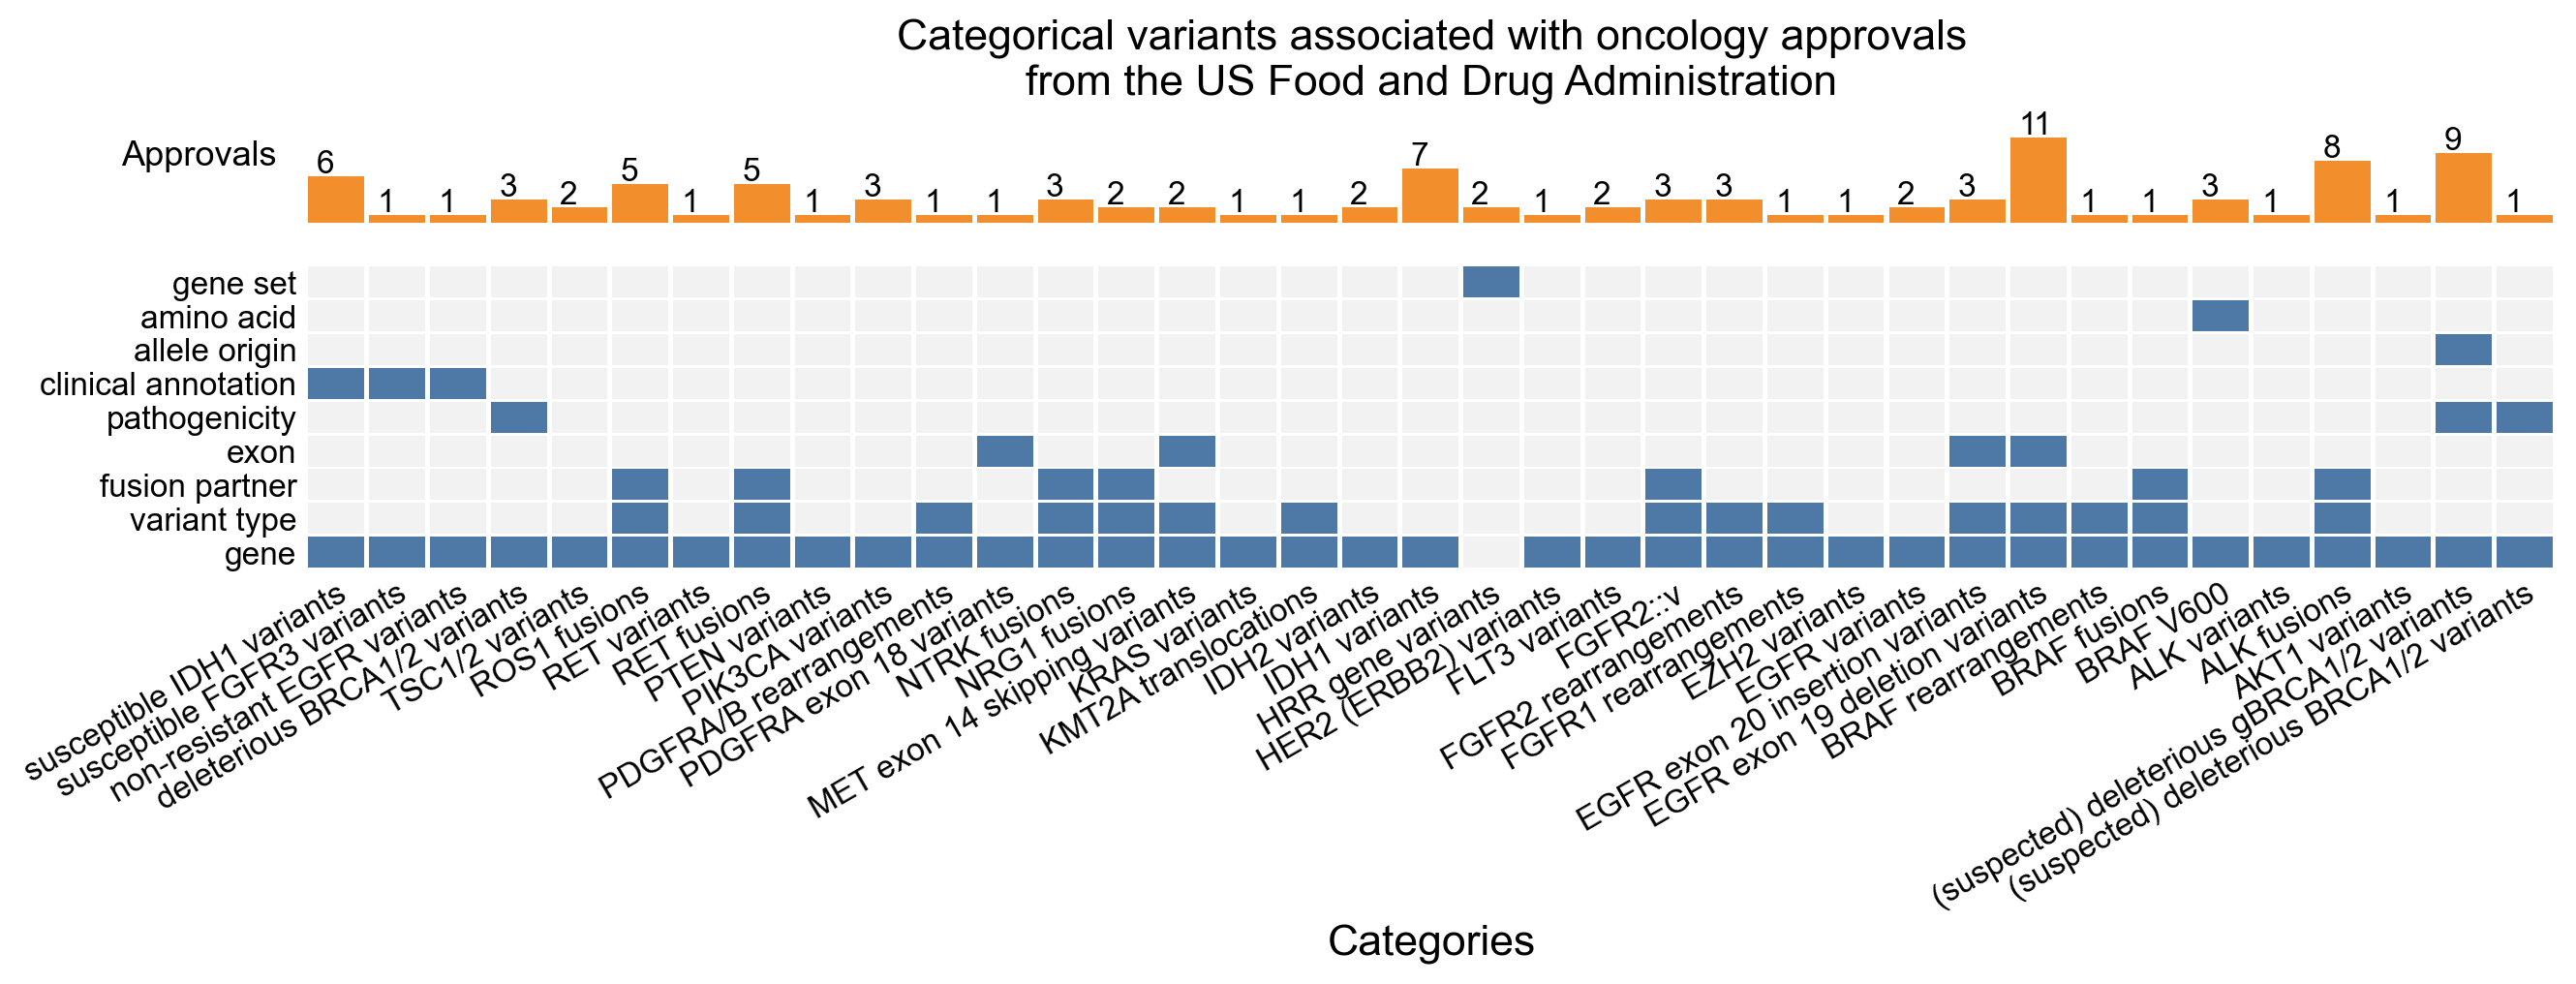

In [205]:
p_with_categories = plot_comutation_plot_horizontal(
    categories_data = horizontal_data_categories,
    counts_data = data_counts_horizontal,
    categories_order = categories_order,
    categorical_variant_order = categorical_variant_order,
    show_categories = True,
    show_legend = False
)
p_with_categories.figure.savefig('fda_categorical_variants.svg', bbox_inches = 'tight', dpi = 300)
p_with_categories.figure.savefig('fda_categorical_variants.png', bbox_inches = 'tight', dpi = 300)

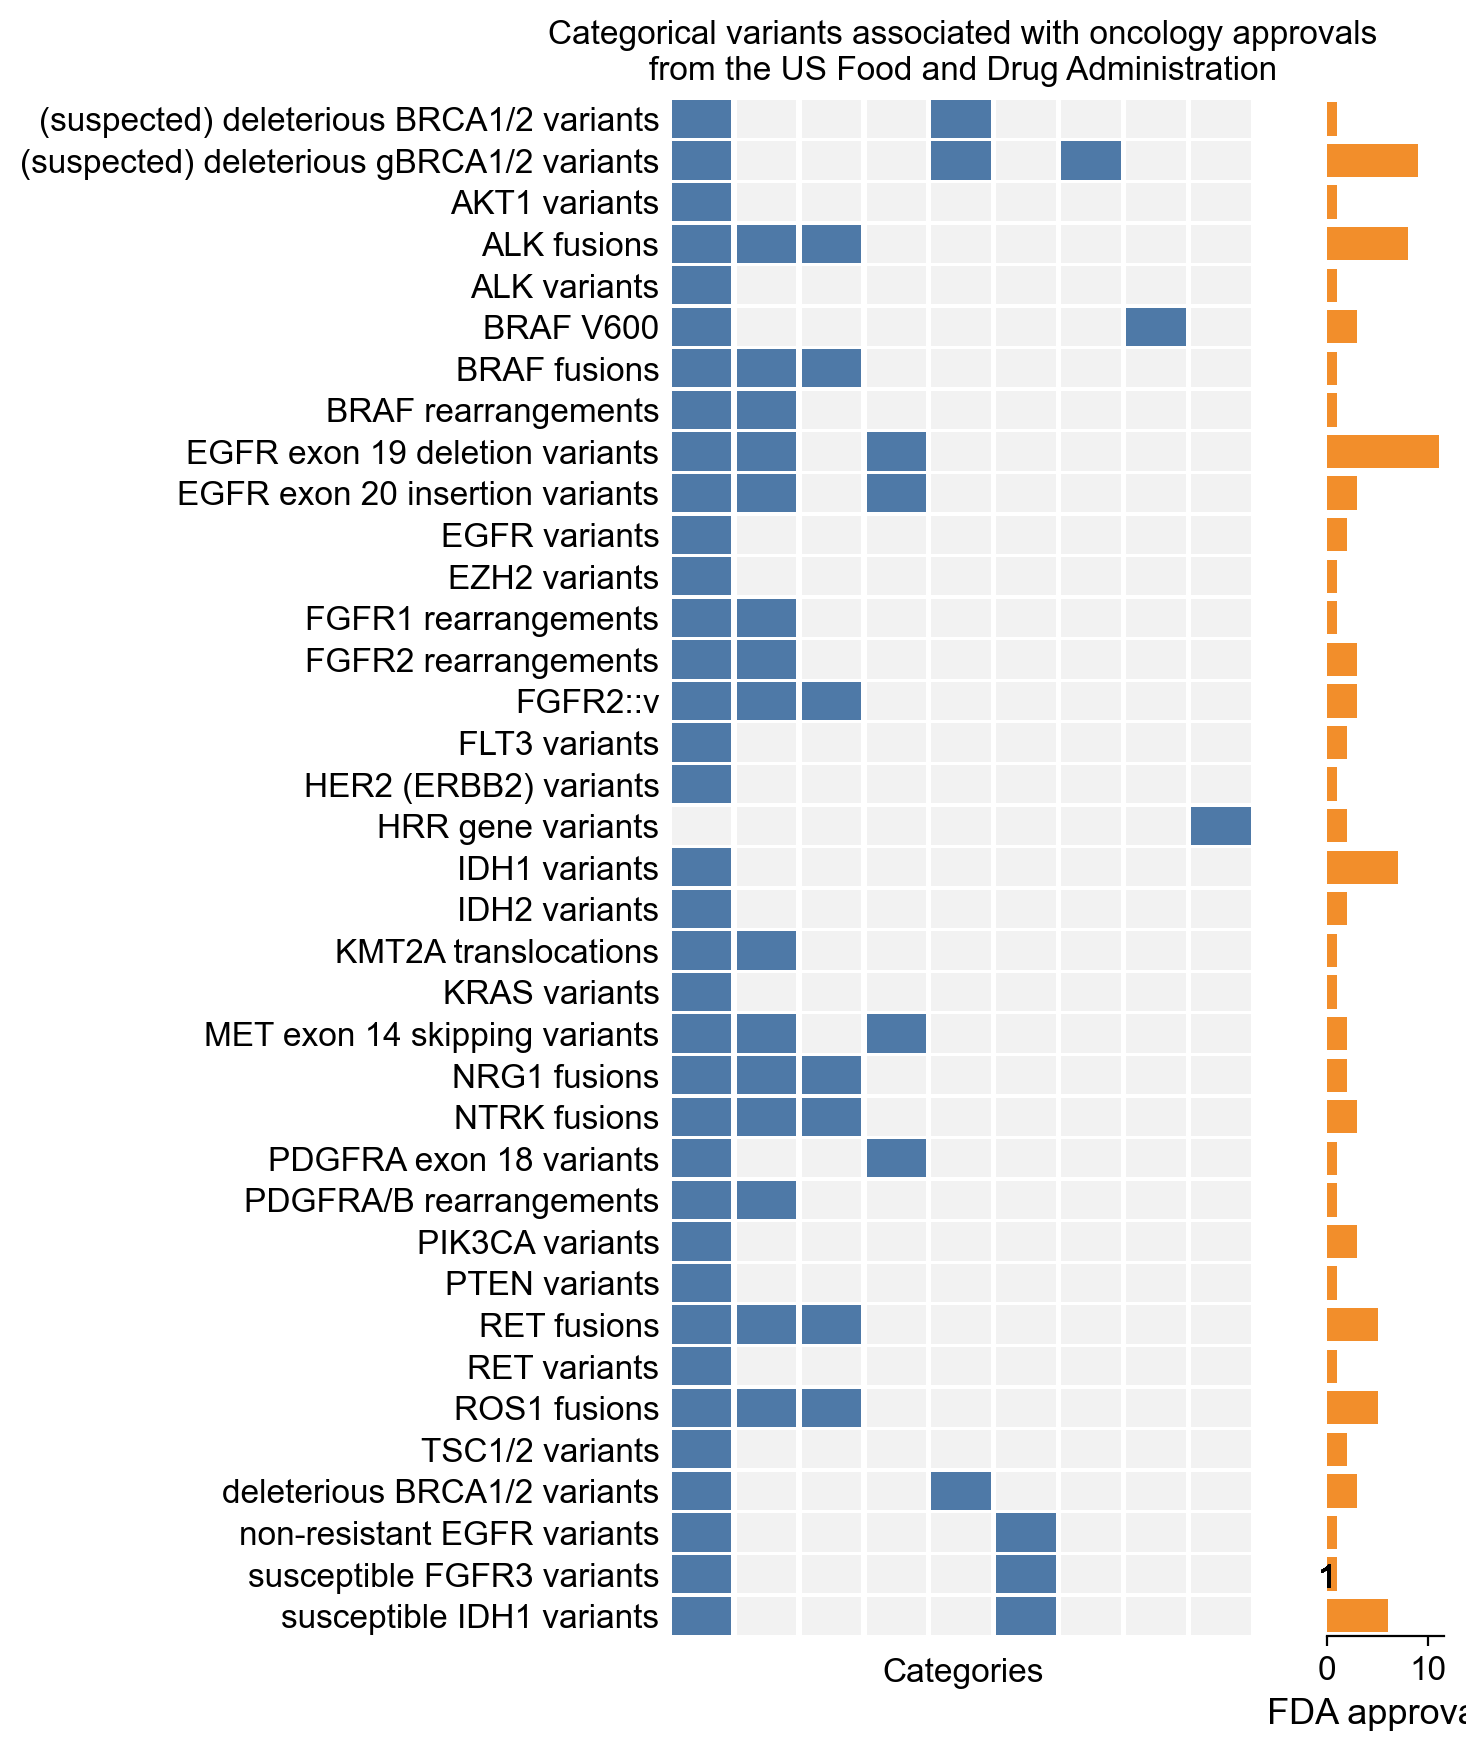

In [187]:
p_without_categories = plot_comutation_plot(
    categories_data = data_categories,
    counts_data = data_counts,
    categories_order = categories_order,
    categorical_variant_order = categorical_variant_order,
    show_categories = False,
    show_legend = False
)
p_without_categories.figure.savefig('fda_categorical_variants.hide_categories.svg', bbox_inches = 'tight', dpi = 300)
p_without_categories.figure.savefig('fda_categorical_variants.hide_categories.png', bbox_inches = 'tight', dpi = 300)